In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
# Load your training and validation sets using image_dataset_from_directory
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",  
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

# Define your model architecture
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5), activation='relu', input_shape=(128,128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())




model.add(Dense(38, activation='softmax'))
# Compile your model with appropriate optimizer, loss, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
from sklearn.preprocessing import LabelEncoder

# Define your plant and disease names
plant_names = [
    'Apple', 'Apple', 'Apple', 'Apple', 'Blueberry', 'Cherry', 'Cherry', 'Corn', 'Corn',
    'Corn', 'Corn', 'Grape', 'Grape', 'Grape', 'Grape', 'Orange', 'Peach', 'Peach', 'Pepper, bell',
    'Pepper, bell', 'Potato', 'Potato', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry',
    'Strawberry', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato'
]
disease_names = [
    '__Apple_scab', '__Black_rot', '__Cedar_apple_rust', '__healthy', '__healthy', '(including_sour)___healthy',
    '(including_sour)___Powdery_mildew', '(maize)___Cercospora_leaf_spot Gray_leaf_spot', '(maize)___Common_rust_',
    '(maize)___healthy', '(maize)___Northern_Leaf_Blight', '__Black_rot', '__Esca_(Black_Measles)', '__healthy',
    '__Leaf_blight_(Isariopsis_Leaf_Spot)', '__Haunglongbing_(Citrus_greening)', '__Bacterial_spot', '__healthy',
    'bell___Bacterial_spot', 'bell___healthy', '__Early_blight', '__healthy', '__Late_blight', '__healthy', '__healthy',
    '__Powdery_mildew', '__healthy', '__Leaf_scorch', '__Bacterial_spot', '__Early_blight', '__healthy',
    '__Late_blight', '__Leaf_Mold', '__Septoria_leaf_spot', '__Spider_mites Two-spotted_spider_mite', '__Target_Spot',
    '__Tomato_mosaic_virus', '__Tomato_Yellow_Leaf_Curl_Virus'
]

# Combine plant and disease names into a single label
labels = [f"{plant}_{disease}" for plant, disease in zip(plant_names, disease_names)]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the combined labels
label_encoder.fit(labels)

# Transform the labels using LabelEncoder
encoded_labels = label_encoder.transform(labels)

# Print the encoded labels for demonstration
print(encoded_labels)




 



# Train your model using the training and validation datasets directly
training_history = model.fit(training_set,
                             validation_data=validation_set,
                             epochs=8)


Found 70296 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


C:\Users\aparn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 125, 125, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,668,806 (6.37 MB)

 Trainable params: 1,668,230 (6.36 MB)

 Non-trainable params: 576 (2.25 KB)

[ 0  1  2  3  4  6  5  7  8 10  9 11 12 14 13 15 16 17 18 19 20 22 21 23
 24 25 27 26 28 29 36 30 31 32 33 34 35]
Epoch 1/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 917s 831ms/step - accuracy: 0.4667 - loss: 2.0810 - val_accuracy: 0.8282 - val_loss: 0.7463
Epoch 2/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 878s 799ms/step - accuracy: 0.8080 - loss: 0.7975 - val_accuracy: 0.8963 - val_loss: 0.4365
Epoch 3/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 883s 803ms/step - accuracy: 0.8730 - loss: 0.5193 - val_accuracy: 0.9214 - val_loss: 0.3216
Epoch 4/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 883s 803ms/step - accuracy: 0.9106 - loss: 0.3691 - val_accuracy: 0.9319 - val_loss: 0.2610
Epoch 5/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 884s 804ms/step - accuracy: 0.9335 - loss: 0.2756 - val_accuracy: 0.9391 - val_loss: 0.2258
Epoch 6/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 883s 803ms/step - accuracy: 0.9494 - loss: 0.2119 - val_accuracy: 0.9420 - val_loss: 0.2052
Epoch 7/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 883s 804ms/step - accuracy: 0.9598 - loss: 0.17

In [2]:
train_loss,train_acc=model.evaluate(training_set)

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 215s 196ms/step - accuracy: 0.9926 - loss: 0.0418


In [3]:
print("train_loss:",train_loss,"train_accuracy:",train_acc)

train_loss: 0.03819691389799118 train_accuracy: 0.993527352809906


In [4]:
valid_loss,valid_acc=model.evaluate(validation_set)

275/275 ━━━━━━━━━━━━━━━━━━━━ 55s 198ms/step - accuracy: 0.9475 - loss: 0.1776


In [5]:
print("valid_loss:",valid_loss,"valid_accuracy:",valid_acc)

valid_loss: 0.18083138763904572 valid_accuracy: 0.9454814195632935


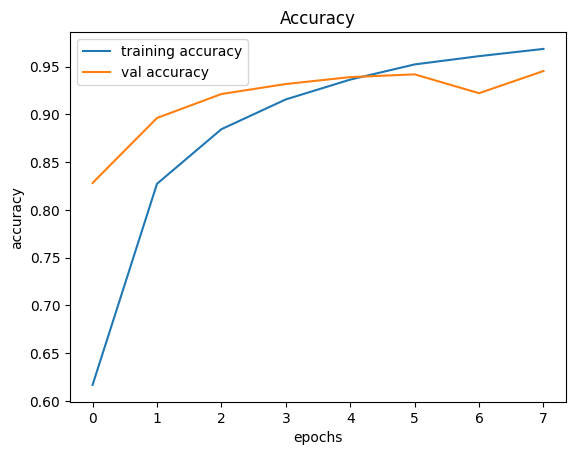

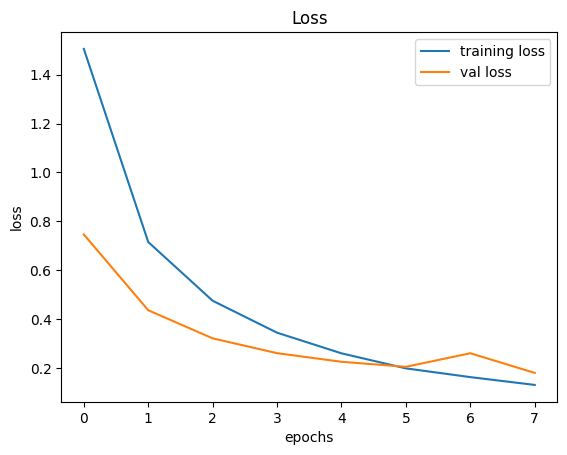

In [6]:
              # Plotting graphs for accuracy
import matplotlib.pyplot as plt
plt.figure(0)
plt.title('Accuracy')

plt.plot(training_history.history['accuracy'], label='training accuracy')
plt.plot(training_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.title('Loss')
plt.plot(training_history.history['loss'], label='training loss')
plt.plot(training_history.history['val_loss'], label='val loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
model.save("plant_disease_prediction_model2.h5")

In [8]:
import json
with open("train_hist.json","w") as f:
    json.dump(training_history.history,f)

In [9]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  # Ensure labels are inferred as integers
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

Found 17572 files belonging to 38 classes.


In [11]:
y_pred=model.predict(test_set)
y_pred

275/275 ━━━━━━━━━━━━━━━━━━━━ 54s 196ms/step


array([[9.70382810e-01, 2.33005285e-02, 4.94196138e-05, ...,
        1.92420543e-06, 1.36919316e-05, 1.34101874e-05],
       [9.17321920e-01, 2.34889016e-02, 6.48810528e-04, ...,
        2.84050020e-05, 2.70483124e-05, 6.50092770e-05],
       [9.99074459e-01, 1.04386432e-04, 8.32275782e-06, ...,
        6.25725477e-07, 1.61467608e-06, 1.99442511e-05],
       ...,
       [2.06559776e-06, 1.82911720e-07, 1.14352824e-05, ...,
        3.44543565e-07, 1.11784175e-07, 9.99451697e-01],
       [1.95183283e-08, 2.53916539e-07, 1.87448677e-06, ...,
        2.35320229e-07, 1.82219377e-08, 9.99770224e-01],
       [4.03391015e-10, 2.62957189e-09, 2.30089281e-09, ...,
        6.92940105e-09, 1.80223935e-07, 9.99965906e-01]], dtype=float32)

In [12]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [13]:
true_categories=tf.concat([y for x,y in test_set],axis=0)

In [14]:
y_true=tf.argmax(true_categories,axis=1)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score






# Calculate overall precision, recall, and F1-score
overall_precision = precision_score(y_true, predicted_categories, average='macro')
overall_recall = recall_score(y_true, predicted_categories, average='macro')
overall_f1_score = f1_score(y_true, predicted_categories, average='macro')

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1-Score:", overall_f1_score)


Overall Precision: 0.9462095698894778
Overall Recall: 0.9455635566437752
Overall F1-Score: 0.9448275499784133


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       504
           1       0.97      0.96      0.96       497
           2       0.98      0.95      0.96       440
           3       0.91      0.94      0.93       502
           4       0.95      0.99      0.97       454
           5       1.00      0.94      0.97       421
           6       0.99      0.99      0.99       456
           7       0.94      0.87      0.91       410
           8       0.99      0.99      0.99       477
           9       0.91      0.93      0.92       477
          10       0.99      0.99      0.99       465
          11       0.98      0.95      0.96       472
          12       0.97      0.98      0.97       480
          13       0.98      1.00      0.99       430
          14       0.96      0.99      0.97       423
          15       0.96      0.99      0.98       503
          16       0.93      0.92      0.92       459
    

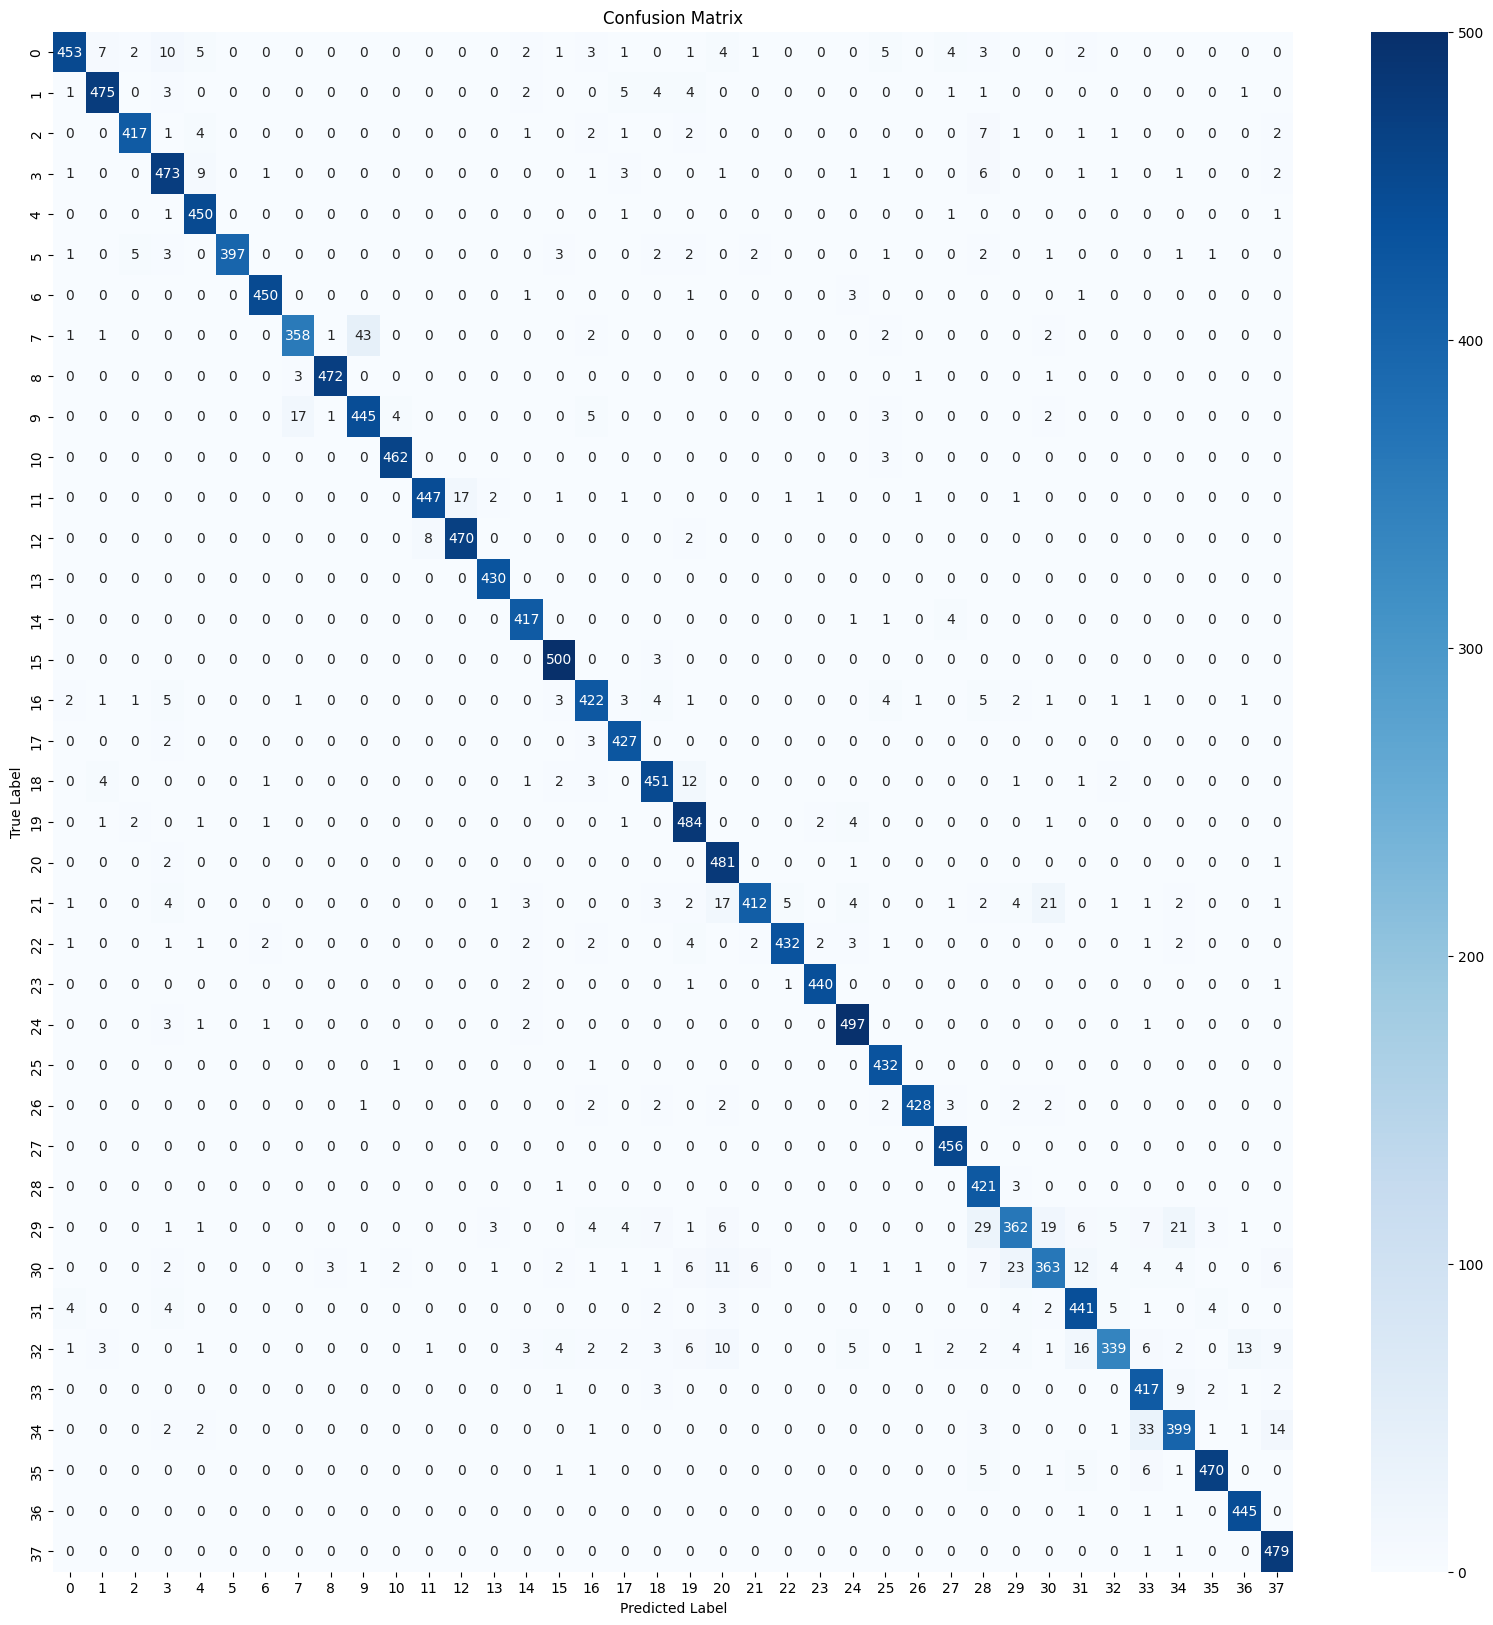

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report:")
print(classification_report(y_true,predicted_categories ))

import seaborn as sns


# Plot confusion matrix
conf_matrix = confusion_matrix(y_true,predicted_categories)
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
model=tf.keras.models.load_model("plant_disease_prediction_model2.h5")

In [21]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']


In [22]:
import cv2

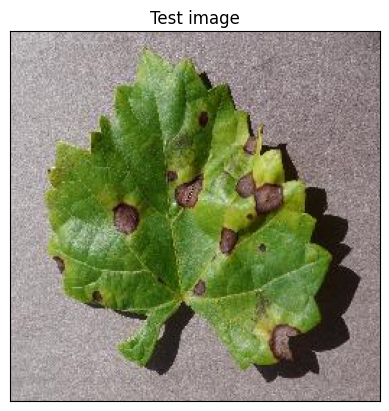

In [23]:
image_path ="valid/Grape___Black_rot/00905d40-bddf-460e-b348-1dbb6a34653b___FAM_B.Rot 0664.JPG"
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [25]:
predictions=model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


In [26]:
result_index=np.argmax(predictions)
result_index

37

In [27]:
model_pred=class_name[result_index]
model_pred

'Tomato___healthy'